<a href="https://colab.research.google.com/github/AdolfK12/pytorch-llm/blob/main/Intro_to_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    # Input layer (4 features of the flower)
    self.fc1 = nn.Linear(in_features, h1) # This line was not indented properly
    self.fc2 = nn.Linear(h1, h2) # This line was not indented properly
    self.out = nn.Linear(h2, out_features) # This line was not indented properly
  # Forward propagation
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [9]:
torch.manual_seed(41)
model = Model()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [12]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [13]:
my_df['variety']= my_df['variety'].replace('Setosa', 0.0)
my_df['variety']= my_df['variety'].replace('Versicolor' ,1.0)
my_df['variety']= my_df['variety'].replace('Virginica' , 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [14]:
# Train Test Split! Set X, y
X = my_df.drop('variety', axis=1).values
y = my_df['variety'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [17]:
x_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [18]:
# Set the criteria of model to measure the error
criterion = nn.CrossEntropyLoss()
# Set the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [24]:
# Train our model
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 0.05286872014403343
Epoch: 10 Loss: 0.04508011043071747
Epoch: 20 Loss: 0.03979310765862465
Epoch: 30 Loss: 0.03596426919102669
Epoch: 40 Loss: 0.03302799537777901
Epoch: 50 Loss: 0.030512524768710136
Epoch: 60 Loss: 0.02773350290954113
Epoch: 70 Loss: 0.024612102657556534
Epoch: 80 Loss: 0.02167237363755703
Epoch: 90 Loss: 0.01932021789252758
Epoch: 100 Loss: 0.0174928717315197
Epoch: 110 Loss: 0.01604374870657921
Epoch: 120 Loss: 0.01483999565243721
Epoch: 130 Loss: 0.013800058513879776
Epoch: 140 Loss: 0.012878856621682644
Epoch: 150 Loss: 0.012144574895501137
Epoch: 160 Loss: 0.011606554500758648
Epoch: 170 Loss: 0.010983292944729328
Epoch: 180 Loss: 0.010267996229231358
Epoch: 190 Loss: 0.00971288699656725
Epoch: 200 Loss: 0.009499614126980305
Epoch: 210 Loss: 0.008920922875404358
Epoch: 220 Loss: 0.008430850692093372
Epoch: 230 Loss: 0.007952299900352955
Epoch: 240 Loss: 0.007868134416639805
Epoch: 250 Loss: 0.007325956132262945
Epoch: 260 Loss: 0.00690963165834546

Text(0.5, 0, 'Epoch')

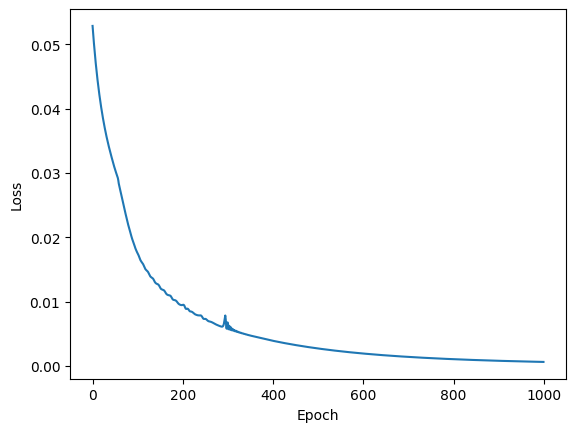

In [25]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
